# Prediction of Student's Performance Based on Behavioral and Environmental Factors
### By Dustin Reyes
### Highlights: 
* Classifying/Predicting the students' final grades based on social and environmental factors
* Introduction and usecase of the AdaBoost classifier
* Machine Learning model with 87.35% test accuracy was achieved through Gradient Boosting method
* Previous Grade is the top predictor in classifying a student's performance of whether poor, fair or good
* Other factors were the number of failures and the number of absences.

### Data Source: https://www.kaggle.com/uciml/student-alcohol-consumption

# 1. Executive Summary

The purpose of this notebook is to predict and classify a student's final grade based on behavioral and environmental factors. The goal is to predict whether the student will have a poor, fair or a good rating on his/her final grade. The notebook also aims to answer the question of what are the factors that can affect a student's performance. In doing the study, several machine learning algorithms were implemented and the algorithm which performed the best was chosen. The Gradient Boosting Classifier algorithm was chosen for this study with a test accuracy of 87.35%. With this, several insights can be deduced which are the ff:
* A student's previous grade has the most effect on his/her future performance
* The record of absences and failures are seen as contributors to a student's academic performance
* Other factors which can affect a student were the mother's educational background, health conditions, age and weekend alcohol consumption

With these insights, we can still try to resolve some of the bad habits that has negative effects to his/her behavior. By preventing the development of these bad habits and the degradation of grades, we can hope to improve our child's school performance thus enhacing their mental capabilities which can lead to optimum learning in class.

# 2. Data Description

Raising an achiever. One of the most challenging tasks that parents must do and must prepare for. It is a responsibility wherein parents must guide their children over the course of their learning phase in life. We all knew that education is an important privilege imparted by parents to their child as it can help the latter to prepare for their career and adulthood. With this, a child's behavior and habits during his/her days as a student can have an impact on his/her academic performance. Other factors which can affect the performance of a student are internet accessibility, area of living, romantic affiliations, extra-curricular activities, health and so on and so forth. 

The data used for this study was taken from https://www.kaggle.com/uciml/student-alcohol-consumption which was obtained in a survey of student's math and portuguese language courses in secondary school. The attributes of the data are the ff:

* **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex** - student's sex (binary: 'F' - female or 'M' - male)
* **age** - student's age (numeric: from 15 to 22)
* **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
* **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
* **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
* **schoolsup** - extra educational support (binary: yes or no)
* **famsup** - family educational support (binary: yes or no)
* **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* **activities** - extra-curricular activities (binary: yes or no)
* **nursery** - attended nursery school (binary: yes or no)
* **higher** - wants to take higher education (binary: yes or no)
* **internet** - Internet access at home (binary: yes or no)
* **romantic** - with a romantic relationship (binary: yes or no)
* **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
* **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
* **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **health** - current health status (numeric: from 1 - very bad to 5 - very good)
* **absences** - number of school absences (numeric: from 0 to 93)
* **G1** - first period grade (numeric: from 0 to 20)
* **G2** - second period grade (numeric: from 0 to 20)
* **G3** - final grade (numeric: from 0 to 20, output target)

In [21]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from collections import Counter
%matplotlib inline
warnings.filterwarnings('ignore')
# %%time

In [22]:
df_mat = pd.read_csv('student-mat.csv')
df_por = pd.read_csv('student-por.csv')
df = pd.concat([df_mat,df_por])
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [23]:
list_cols = list(df.columns)
print(list_cols)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


# 3. Exploratory Data Analysis

In conducting the study, the data was further observed through exploratory data analysis. As observed from the display of the values of the dataset, categorical variables were checked if there are misclassifications of being either nominal or ordinal variables.  In order to have an efficient process, the data was first check for missing values.

In [24]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Through observation, it can be seen that the data provided has no missing values. Since the goal of this study is to predict the final grade of the students, the grading was classfied based on a certain range. From a grade of 0-9 to be classified as **'poor'**, from a grade of 10-14 to be classified as **'fair'** and from a grade of 15-20 to be classified as **'good'**. The main idea now is to predict the student's final grades as a classification among these three values.

In [25]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df['G3'] >= 15) & (df['G3'] <= 20), 'final_grade'] = 'good'
df.loc[(df['G3'] >= 10) & (df['G3'] <= 14), 'final_grade'] = 'fair'
df.loc[(df['G3'] >= 0) & (df['G3'] <= 9), 'final_grade'] = 'poor'
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


## 3.1 Correlation Analysis

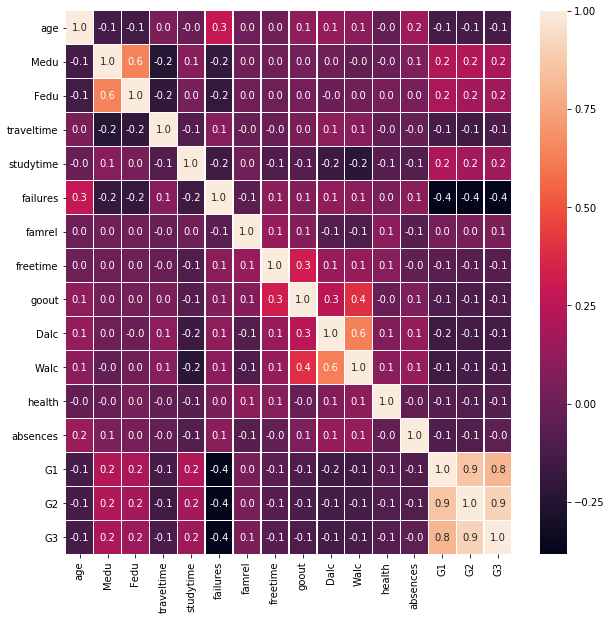

In [26]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

By observing the correlations among variables, it can be seen that certain variables have effects on other variables that is either positive or negative. As expected, the previous grades were highly correlated to each other. The case was also the same for the daily alchohol consumption (***Dalc***) to weekend alcohol consumption (***Walc***) and with the mother's education (***Medu***) with the father's education (***Fedu***). Knowing the correlation among these variables can help us if we chose to do feature selection, feature engineering or feature importance. With this, we check what are some of the factors which can affect a student's academic performance.

## 3.2 Student Count according to Final Grade

Text(0, 0.5, 'Number of Student')

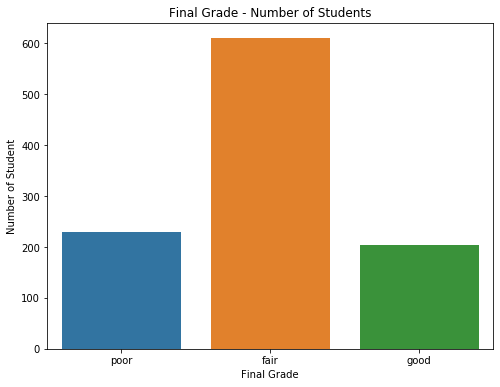

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(df['final_grade'], order=["poor", "fair", "good"])
plt.title('Final Grade - Number of Students')
plt.xlabel('Final Grade')
plt.ylabel('Number of Student')

Observing the graph, it seems that the majority of the students from the dataset have a grade that is fair. The count of students with poor and good grades are almost equal to each other. This proves a realistic assumption that most students have an average grade as compared to those with exceptional and poor academic performance.

## 3.3 Does alcohol consumption during weekends affect student performance?

In [28]:
# weekend alcohol consumption
perc = (lambda col: col/col.sum())
index = ['poor', 'fair', 'good']
alc_tab1 = pd.crosstab(index=df['final_grade'], columns=df['Walc'])
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Level of Alcohol Consumption')

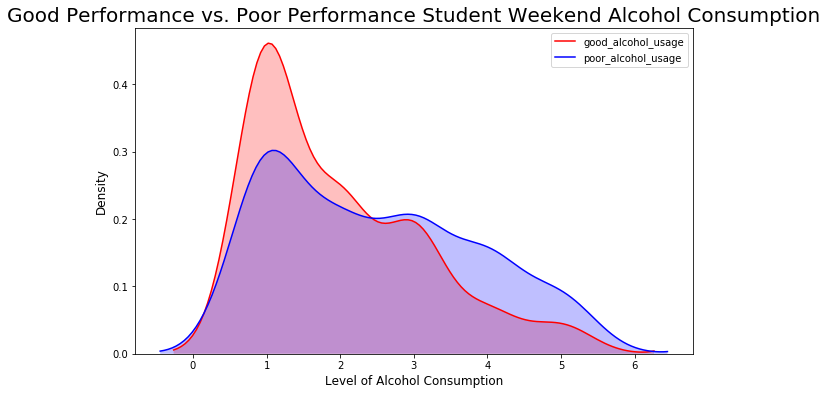

In [29]:
good = df.loc[df['final_grade'] == 'good']
good['good_alcohol_usage'] = good['Walc']
# create poor student dataframe
poor = df.loc[df['final_grade'] == 'poor']
poor['poor_alcohol_usage'] = poor['Walc']

plt.figure(figsize=(10, 6))
p1 = sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1 = sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=12)
plt.xlabel('Level of Alcohol Consumption', fontsize=12)

By observing the density plots between good vs poor performance with regards to student weekend alcohol consumption, it can be seen that those with the good performance tend to drink less than those with poor performance.

Text(0.5, 0, 'Final Grade')

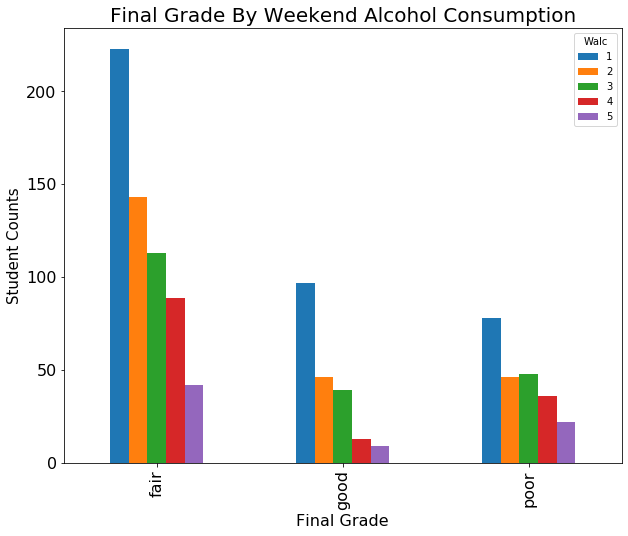

In [30]:
alc_tab1.plot.bar(figsize=(10, 8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Student Counts', fontsize=15)
plt.xlabel('Final Grade', fontsize=16)

With this, we can say that weekend alcohol consumption has an effect to a student's performance in school.

## 3.4 Does frequency of going out affect student performance?

Text(0.5, 0, 'Frequency of Going Out')

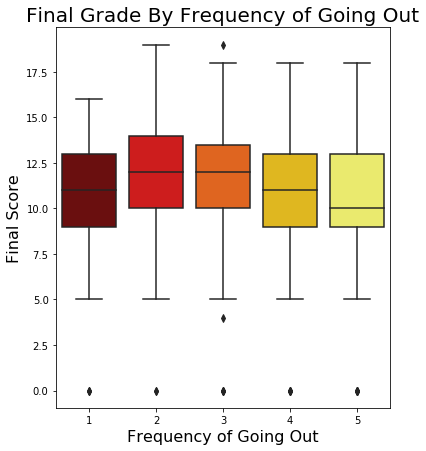

In [31]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6, 7))
sns.boxplot(x='goout', y='G2', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

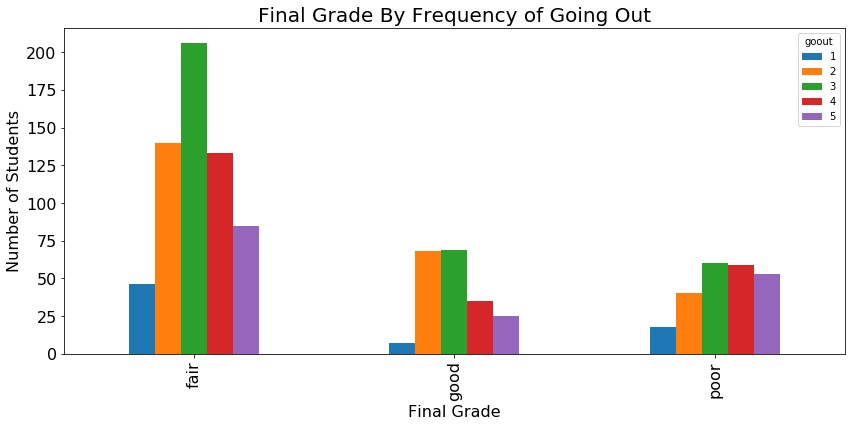

In [32]:
out_tab = pd.crosstab(index=df['final_grade'], columns=df['goout'])

out_tab.plot.bar(fontsize=16, figsize=(14, 6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Number of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

We now ask the question of whether or not the frequency of going out has an effect to academic performance. By basing on the two graphs, it can be assumed that the frequency of going out is a variable to be considered in predicting the final grade.

## 3.5 Does living near Urban areas affect student performance?

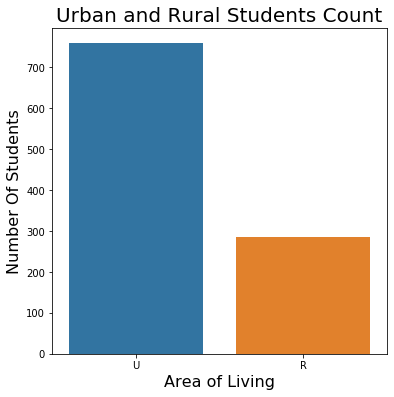

In [33]:
plt.figure(figsize=(6, 6))
sns.countplot(df['address'])
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Area of Living', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

Looking at the count of students living in an Urban or Rural environment, it can be seen that more students are living in an urban setting.

In [34]:
ad_tab1 = pd.crosstab(index=df['final_grade'], columns=df['address'])

Text(0.5, 0, 'Final Grade')

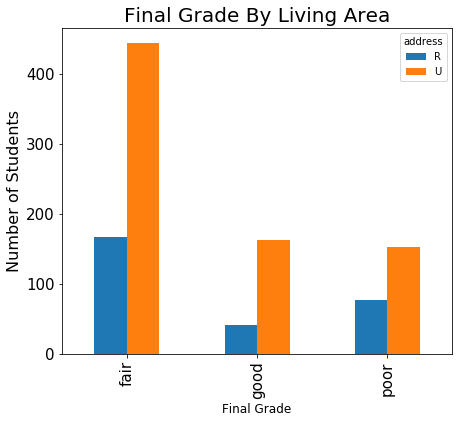

In [35]:
ad_tab1.plot.bar(fontsize=15, figsize=(7, 6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Number of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)

By taking a look at the final grades of students and whether they are living either in an urban or rural area, it can be clearly seen that urban living students tend to perform better. Thus the area of where a student lives can have a significant effect to his/her academic performance.

These three examples show just some of what to be expected in observing this dataset. There are many other combinations to know and observe the effects on performance such as romantic relationships' effect, the parents educational background and job, the accessibility of internet and its effect on studying and many others.

# 4. Data Processing

In processing the data, we need to account for the redundancy of columns and know which variables needs consideration (handling of ordinal and nominal categorical variables). In doing so, we can be rest assured that the results of the machine learning algorithms can be reliable and does not suffer from problems such as multicollinearity and long training times.

The first step in for in processing the data for this study is dropping the column ***G3***. This is because the column ***final grade***, which is our target/goal variable, is derived from ***G3***. This helps reduce correlation of variables.

In [36]:
df_copy = df.copy()
# Drop G3 because it is redundant with Final_grade
df_copy = df_copy.drop(['G3'], axis=1)

The second step that we need to do is to label encode the target variable. Using **LabelEncoder** function, we can convert the target variable into values that will be useful for the algorithms to work

In [37]:
class_le = LabelEncoder()
df_copy['final_grade'] = class_le.fit_transform(df_copy['final_grade'].values)
df_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0


Lastly, we need to account for nominal features from our data. To do this, one-hot encoding or the nifty **get_dummies** function of pandas will be used. With this, we can create a new dummy feature for each unique value in each nominal feature column. In doing this, multicollinearity can be introduced and this is mitigated by the parameter **drop_first**. By setting it into True, the first column of the resulting dummy variables will be dropped and with this, the important information will still be retained.

In [38]:
df_dummy = pd.get_dummies(df_copy, drop_first=True)

In [39]:
print(list(df_dummy.columns))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'final_grade', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']


# 4.1 Proportional Chance Criterion

An important part of data processing involves checking for the proportional chance criterion of the dataset. In doing so, the PCC computes the highest possible random chance of classifying data without explicit mathematical model other than population counts. In general, a classifier machine learning model is considered highly succcesful when the test accuracy exceeds 1.25 𝐏𝐶𝐶

Division per class:      0
2  230
0  610
1  204

1.25 * Proportion Chance Criterion: 53.51415128961702%


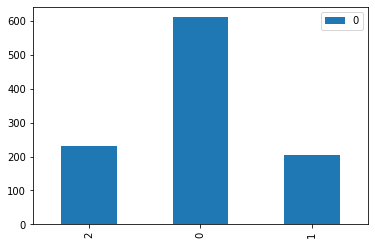

In [40]:
state_counts = Counter(df_dummy['final_grade'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num = (df_state[0]/df_state[0].sum())**2
print("Division per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

Observing from the results, our machine learning model should beat atleast **53.5%** accurate in order to be a highly successful machine learning model.

# 5. Classification

In order to predict the student's final grades, several machine learning algorithms will be used for classification. In performing these algorithms, GridSearch will be used to identify the best possible parameters. **GridSearchCV** does an exhaustive search over the specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. With this, we hope to know the best possible algorithm to use for the study.

The following are the machine learning algorithms that were used.
* **K-Nearest Neighbor (kNN)** - According to https://www.saedsayad.com, K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). The main advantage of KNN is that it is non-parametric and that it is easy to understand while its main disadvantage is that it memorizes the system which makes it difficult to interpret.
* **Logistic Regression** - Logistic Regression is a linear model that is used for classification. If used on its own, using a linear model is prone to overfitting thus needing for regularization. In short, regularization helps prevent overfitting and is implemented by two regularization methods: ***Ridge/L2 Regularization*** and ***Lasso/L1 Regularization***. 
* **Support Vector Machines** - For support vector machines, the main goal is to maximize the margin. It basically uses support vectors to improve generalization and robustness of linear classification. Regularization (L1 and L2) will also be used for the purposes of preventing overfitting.
* **Random Forest Classifier** - Random Forest Classifier (RFC) is an information-based machine learning algorithm which basically takes the average of many decision trees. The main advantage of an RFC is that it is invariant to scaling of data while its main disadvantage is that the predictions made were not easy to understand.
* **Gradient Boosting Algorithm** - By definition, Boosting is a method of converting weak learners into strong learners. Gradient Boosting is considered as one of the most powerful machine learning algorithms for building predictive models. The main disadvantage of using Gradient Boosting is that it can easily be altered by changes in the training set or learning rate.
* **AdaBoost Classifier** - AdaBoost was one of the first boosting algorithms. Known as ***Adaptive Boosting***, the main idea for AdaBoost Classifier is to set weights to both classifiers and data points (samples) in a way that forces classifiers to concentrate on observations that are difficult to correctly classify. The AdaBoost classifier aims to convert a set of weak classifiers into a strong one.

## 5.1 AdaBoost Classifier

According to www.towardsdatascience.com, the AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree. Our new model is therefore ***Tree 1 + Tree 2***. We then compute the classification error from this new 2-tree ensemble model and grow a third tree to predict the revised residuals. We repeat this process for a specified number of iterations. Subsequent trees help us to classify observations that are not well classified by the previous trees. Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models.

To make the discussion short, what the AdaBoost Classifier does is it basically combines predictors by adaptively weighting the difficult to classify samples more heavily. From there, predictions will be made based on the predictions of the various weak learners from the ensemble.

For AdaBoost Classifiers, there are three important parameters to consider and these are:
* base_estimator - The parameter base_estimator is used to provide the learning algorithm to train the weak learners in the ensemble. By default, a decision tree learning algorithm is used as the value for the base_estimator with a max_depth of 1. One can tweak this parameter in order to get the best possible perfomance of the classifier.
* n_estimator - This parameter is used to define the number of models to iteratively train.
* learning_rate -  This is the contribution of each model to the weights and defaults to 1.
All these parameters except for the base_estimator will be used by the GridSearchCV function in order to have the best possible performance among all parameter grids.

In [41]:
cl1 = KNeighborsClassifier(n_jobs=-1)
cl2 = LogisticRegression(penalty='l1', max_iter=1000,
                         solver='liblinear', n_jobs=-1)
cl3 = LogisticRegression(penalty='l2', max_iter=1000, n_jobs=-1)
cl4 = LinearSVC(penalty='l1', dual=False, max_iter=10000)
cl5 = LinearSVC(penalty='l2', max_iter=10000)
cl6 = SVC(kernel='rbf', )
#cl7 = SVC(kernel='poly', degree=3)
cl8 = RandomForestClassifier(n_jobs=-1)
cl9 = GradientBoostingClassifier()
cl10 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))


kneighbors = range(1, 31)
C_list = np.logspace(-5, 5, num=10)
gamma_list = np.logspace(-5, 5, num=10)
max_depthlist = [3, 4, 6, 8]
max_featureslist = [1, 2, 3, 4]
n_estimatorslist = [100, 200, 300, 400]
learningrate_list = [.2, 0.1, 0.02, 0.01]

estimators = [('KNN', cl1, {'n_neighbors': kneighbors}),
              ('Logistic Regression (L1)', cl2, {'C': C_list}),
              ('Logistic Regression (L2)', cl3, {'C': C_list}),
              ('Linear SVM (L1)', cl4, {'C': C_list}),
              ('Linear SVM (L2)', cl5, {'C': C_list}),
              ('NonLinear SVM (RBF)', cl6, {'C': C_list, 'gamma': gamma_list}),
              ('Random Forest Classifier', cl8, {'n_estimators': n_estimatorslist,
                                                 'max_depth': max_depthlist,
                                                 'max_features': max_featureslist}),
              ('Gradient Boosting Classifier', cl9, {'n_estimators': n_estimatorslist,
                                                     'max_depth': max_depthlist,
                                                     'learning_rate': learningrate_list}),
              ('AdaBoost Classifier', cl10, {'n_estimators': n_estimatorslist,
                                             'learning_rate': learningrate_list})]

In [42]:
X_clean = df_dummy

In [43]:
X = X_clean.drop('final_grade', axis=1)
y = X_clean['final_grade']

## 5.2 Feature Selection 

From the correlation heatmap described earlier, we can clearly see some correlation among features. In order for the models to have an efficient and faster training time, we need to select the relevant features which will contribute to the prediction of the machine learning models. For feature selection, we use the ***LassoCV*** in order to identify which features are important. Together with ***SelectFromModel***, we can select the features based on importance weights.

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
# We use the base estimator LassoCV
clf = LassoCV(cv=5)

# Set a minimum threshold of 0.70
sfm = SelectFromModel(clf)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Extracting the index of important features
feature_idx = sfm.get_support()

# Using the index to print the names of the important variables
new_cols = X.columns[feature_idx]
new_cols

Index(['age', 'Medu', 'failures', 'Walc', 'health', 'absences', 'G2'], dtype='object')

In [32]:
X = X[new_cols]
X.head()

,age,Medu,failures,Walc,health,absences,G2
0,18,4,0,1,3,6,6
1,17,1,0,1,3,4,5
2,15,1,3,3,3,10,8
3,15,4,0,1,5,2,14
4,16,3,0,2,5,4,10


With this, it can be assumed that **age, Medu, failures, Walc, health, absences and G2** are the most important features which will contribute to the prediction of the students' final academic performance.

## 5.3 Classification Proper

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,
                                                  random_state=15)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [50]:
models = {}
for est in estimators:
    print(f'Training {est}\n')
    gs_cv = GridSearchCV(est[1], param_grid=est[2], n_jobs=-1)
    gs_cv.fit(X_train, y_train)
    models[est[0]] = gs_cv

Training ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), {'n_neighbors': range(1, 31)})

Training ('Logistic Regression (L1)', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), {'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])})

Training ('Logistic Regression (L2)', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   mu

In [51]:
cols = ['Machine Learning Method', 'Training Accuracy', 'Test Accuracy',
        'Best Parameter', 'Top Predictor']
df2 = pd.DataFrame(columns=cols)

for i, m in enumerate(models):
    try:
        top = X.columns[np.argmax(
            np.abs(models[m].best_estimator_.coef_.T.mean(axis=1)))]
    except AttributeError:
        try:
            top = X.columns[
                np.argmax(np.abs(models[m].best_estimator_.feature_importances_))]
        except AttributeError:
            top = np.nan
    except AttributeError:
        top = np.nan

    df2.loc[i] = [m,
                  models[m].best_estimator_.score(X_train, y_train),
                  models[m].best_estimator_.score(X_val, y_val),
                  models[m].best_params_,
                  top]

# 6. Analysis of Results

In [52]:
df2

,Machine Learning Method,Training Accuracy,Test Accuracy,Best Parameter,Top Predictor
0,KNN,0.813538,0.735632,{'n_neighbors': 7},NaN
1,Logistic Regression (L1),0.883780,0.877395,{'C': 3.593813663804626},G2
2,Logistic Regression (L2),0.882503,0.873563,{'C': 599.4842503189421},G2
3,Linear SVM (L1),0.877395,0.873563,{'C': 3.593813663804626},G2
4,Linear SVM (L2),0.878672,0.869732,{'C': 599.4842503189421},G2
5,NonLinear SVM (RBF),0.886335,0.869732,"{'C': 100000.0, 'gamma': 0.0001291549665014884}",NaN
6,Random Forest Classifier,0.886335,0.877395,"{'max_depth': 3, 'max_features': 4, 'n_estimat...",G2
7,Gradient Boosting Classifier,0.918263,0.873563,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",G2
8,AdaBoost Classifier,0.614304,0.662835,"{'learning_rate': 0.2, 'n_estimators': 100}",Walc


Based on the results of the machine learning algorithms, it can be concluded that the **Gradient Boosting** classifier was the best machine learning algorithm for building the model by having a test accuracy of **87.4%**. This conclusion also takes into account the tendency of a classifier to either underfit or overfit. By comparing GBM with other classifiers, it can be seen that it is not underfitting as compared to others. The top predictor for Gradient Boosting is the second period grading (G2) of a student. This might be because a student's second grading is a huge mental factor to a student's capability to perform. This is why, early mitigation of performance is a must in order to have good academic performance in the future.

## 6.1 Feature Importance

In order to know what are the most important factors that can affect the student's performance, we use the feature importance method provided by ensemble methods. By using also the best parameters given by the GridSearchCV function, we can determine the most important features. 

0.8620689655172413


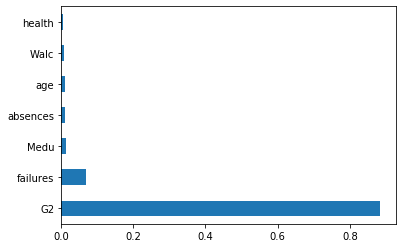

In [53]:
model = RandomForestClassifier(max_depth=3, max_features=4, n_estimators=200)
model.fit(X_train, y_train)
print(model.score(X_val, y_val))
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

With this, it can be said that the second period grading was the most important factor in predicting a child's academic performance. Other important factors by ranking are the number of failures, Medu, absences, age, weekend alcohol consumptions and health. 

## 6.2 Confusion Matrix (Model Validation)

Test Accuracy of 0.8735632183908046


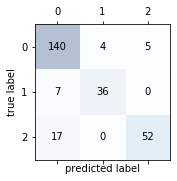

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       149
           1       0.90      0.84      0.87        43
           2       0.91      0.75      0.83        69

    accuracy                           0.87       261
   macro avg       0.89      0.84      0.86       261
weighted avg       0.88      0.87      0.87       261



In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model = GradientBoostingClassifier(
    learning_rate=0.02, max_depth=4, n_estimators=100)
model.fit(X_train, y_train)
print('Test Accuracy of {}'.format(model.score(X_val, y_val)))

#pipe_svc.fit(X_train, y_train)
y_pred = model.predict(X_val)
confmat = confusion_matrix(y_true=y_val, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

print(classification_report(y_val, y_pred))

Using a confusion matrix, model validation provided three metrics namely ***precision***, ***recall***, and ***f1-score***. In short summary, precision refers to the percentage of your results which are relevant while recall refers to the percentage of total relevant results correctly classified by your algorithm. The results of the model validation for the model gave numbers as high as 94% for recall and 91% for precision which is a good indicator of performance.

# 7. Summary and Conclusion

To summarize the results, we briefly go back to what we have observed. The machine learning model that had the best results is the Gradient Boosting Classifier algorithm with a test accuracy of **87.35%**. The goal of this study is to first identify the factors that can affect a student's academic performance. The results showed that the previous grading contributes the most in the prediction of the final grade followed by the number of failures and the number of absences. Realistically speaking, a student's final grade is indicative of his/her learning from the previous grading period. We all know that education is progressive meaning you apply what you have learned in the past in order to learn something new. Since we knew that a student's behavior can affect their learning performance, we can still try to resolve some of the bad habits that has negative effects to his/her behavior. By preventing the development of these bad habits and the degradation of grades, we can uplift our child's school performance thus enhacing their mental capabilities.

However, this study is only limited to caring about a child's academic performance and that we are not considering what they want and their happiness. This is a suggestion from me, wherein happiness must also be considered for it can reflect the state of well-being of a child both mentally and psychologically.

# 8. Recommendations

* Explore the feasibility of including a happiness index for students
* Explore the use of more powerful machine learning algorithms such as XGBoost and LightGBM

# 9. References and Acknowledgements

* Albon, C. (2017, December 20). Adaboost Classifier. Retrieved from www.chrisalbon.com: https://chrisalbon.com/machine_learning/trees_and_forests/adaboost_classifier/
* Sharma, M. (2018, November 26). USING SCIKIT-LEARN IN PYTHON FOR FEATURE SELECTION. Retrieved from www.datasciencebeginners.com: https://datasciencebeginners.com/2018/11/26/using-scikit-learn-in-python-for-feature-selection/
* Singh, H. (2018, November 4). Understanding Gradient Boosting Machines. Retrieved from www.towardsdatascience.com: https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab
* Student Alcohol Consumption. (2016, October 19). Retrieved from www.kaggle.com: https://www.kaggle.com/uciml/student-alcohol-consumption
* Machine Learning notebooks from Professor Chris Monterola
* Machine Learning insights from Professor Erika Legara
